# Using the GLM to Model fMRI Data
So now we have seen how to use the GLM to estimate parameters and their uncertainty using non-imaging data, but how do we apply this to an fMRI dataset? Remember from previous lessons that we have focused on the fMRI time series at each voxel as our primary data of interest. In the context of the GLM, these time series represents our outcome variable. What about our predictor variables? Well, as we will see, we can create predictors for the change in signal based on the timing of our experimental conditions. So for each voxel we have a different outcome variable and the same set of predictors. The approach is then to loop through every voxel in the image, estimating the GLM for each time series separately. This approach is known as the mass-univariate framework, and was first introduced by Friston et al. (1994).
The mass-univariate framework

The mass-univariate approach to modelling fMRI data is fairly straightforward if you already understand the GLM. We build a design matrix of predictors that relate to our experimental conditions that we call X. We then use X to estimate the GLM at each voxel separately. So for voxel $\nu$ we have

$$
\mathbf{Y}_{\nu} = \mathbf{X}\boldsymbol{\beta}_{\nu} + \boldsymbol{\epsilon}_{\nu}
$$

so that the outcome variable, parameters and errors are unique to that voxel, but the design matrix is the same across all voxels. By doing this, we will end up with as many $\boldsymbol{\beta}$ vectors and $\boldsymbol{\epsilon}$ vectors as there are voxels. These values can be saved to images, as illustrated below. Typically SPM will not keep the images of the residuals in order to save space, but will keep the image of $\sigma^{2}_{\nu}$ for later calculation of the standard errors.

It is important to take a moment and consider what these images are showing. If we remember the interpretation of the parameters from the GLM, a parameter estimate image associated with a continuous predictor variable will show us the magnitude of the regression slope at each voxel. Similarly, a parameter estimate image associated with a categorical predictor variable will show us the magnitude of the mean difference at each voxel. In both cases, brighter voxels mean larger estimates and darker voxels mean smaller estimates. Importantly, because these estimates can be positive or negative, those regions that are darkest or brightest are of most interest, with those regions that are grey representing estimates hovering around 0. Even before going any further we can see how these images show us interesting regional effects associated with our predictor variables.

## Creating Predictors for the Time Series
As indicated above, the mass-univariate approach depends upon forming a design matrix that can be used at each voxel to predict changes in the BOLD signal associated with our experimental conditions. The easiest way to do this is to use a dummy variable, where a value of 1 indicates the presence of an experimental stimulus and a value of 0 indicates its absence. To make this clear, imagine a very simple finger tapping experiment where the subject is instructed to tap their fingers for 7 seconds followed by resting for 7 seconds. We repeat this on-off pattern 8 times. In order to code this as a dummy variable, we can use a value of 0 to represent periods of rest and a value of 1 to indicate periods of tapping. Any region of the brain that follows this on-off pattern we assume is related to the action of finger tapping. For instance, consider the illustration below showing a timeseries from the motor cortex on the left and a dummy variable for the tapping conditions on the right. This type of dummy variable forms what is known as a block design, which we will learn more about in the Experimental Design and Optimisation module. You may also see this type of dummy variable referred to as a box-car regressor.

In terms of the GLM, adding this form of dummy variable is straightforward, as shown on the right. The design matrix contains a columns of 1's for the intercept and then our dummy variable coding which elements of the timeseries in Y were measured during rest and which elements were measured during tapping. In terms of interpreting the parameters, we know that a dummy variable will give us a mean difference between the category coded with a 1 and the category coded with a 0. In this instance, it will tell us the average difference in signal between the rest and tapping conditions. Our image of the estimate of $\beta_{1}$ will therefore show us where in the brain the largest signal change occurred between rest and tapping. The value of $\beta_{0}$ will therefore be the average signal during the rest condition, forming our baseline. The average signal value during the tapping condition is therefore given by $\beta_{0} + \beta_{1}$, as illustrated below.

## Visualising the Design Matrix
As already indicated, the design matrix is a very important part of the GLM. No only is it the only element of the GLM equation that is constant across voxels, but it also encodes our predictions about what we expect to see in regions of the brain that are responding to our experimental conditions. Knowing the structure of the design matrix is therefore essential to be able to interpret the parameter estimates. Because of this, SPM take the unique step of drawing the design matrix for us as a summary of our model. When we come to specifying the GLM using SPM, we will be presented with the design matrix drawn as a greyscale image, as illustrated below. Here, solid blocks of colour represent dummy variables whereas those columns with a gradient represent continuous variables.

We can see the same effect by using the `imagesc` function in MATLAB with the design matrix from the previous example

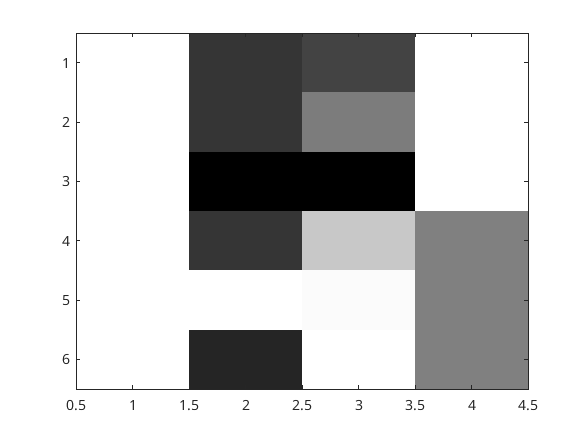

In [7]:
X = [1     1     1     1     1     1;     ...
     110   110   93    110   175   105;   ...
     2.620 2.875 2.320 3.215 3.440 3.460; ...
     1     1     1     0     0     0]';

X(:,2) = rescale(X(:,2),-1,1); % Scale horsepower into [-1 1]
X(:,3) = rescale(X(:,3),-1,1); % Scale weight into [-1 1]

imagesc(X); colormap('gray');

## Time Series and Regression Perspectives

Compared to when we were applying the GLM to non-imaging data, one of the additional complications of timeseries data is that it has a natural order based on when each data point was collected. What this means is that there are actually two complimentary perspectives we can use to view the data and the model. This can be helpful because both perspectives are correct, but you may find one more intuitive than the other.

In the time series perspective, we view the data in its natural ordering. So when plotted, we have time on the x-axis and intensity on the y-axis. From this perspective, we can see gross changes in the shape of the signal over time. We can also superimpose our model prediction to see where the predicted signal change corresponds to a change in the raw data. This perspective is shown in the left column of the figure below for a timeseries with a strong signal change (top) and a weak signal change (bottom).

In the regression perspective, we view the data like a typical multiple regression problem. So when plotted, we have our predictor variable on the x-axis and intensity on the y-axis. For a dummy predictor variable, this means our x-axis will correspond to values of 1 and 0, depending on whether the data were gathered during one experimental condition or the other. From this perspective, superimposing the model prediction means drawing the regression line between the two clusters of data. This perspective is shown in the right column of the figure below.